In [138]:
library(ranacapa)
library(phyloseq)
library(openxlsx)
library(stringr)
library(ggplot2)
library(vegan)
library(dada2)

In [2]:
fnFs <- sort(Sys.glob("eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S*/*_R1.fastq.gz"))
fnRs <- sort(Sys.glob("eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S*/*_R2.fastq.gz"))

In [3]:
lapply(list(fnFs, fnRs), length)

[[1]]
[1] 67

[[2]]
[1] 67

In [4]:
#This removes the unknown files
fnFs <- fnFs[stringr::str_detect(fnFs, "unknown_R1.fastq.gz", negate = TRUE)]
fnRs <- fnRs[stringr::str_detect(fnRs, "unknown_R2.fastq.gz", negate = TRUE)]

In [5]:
lapply(list(fnFs, fnRs), length)

[[1]]
[1] 64

[[2]]
[1] 64

In [6]:
#remove non-zero size files
non_zero_fnFs <- sapply(fnFs, function(file) file.info(file)$size > 1)
fnFs <- fnFs[non_zero_fnFs]
non_zero_fnRs <- sapply(fnRs, function(file) file.info(file)$size > 1)
fnRs <- fnRs[non_zero_fnRs]

In [7]:
lapply(list(fnFs, fnRs), length)

[[1]]
[1] 64

[[2]]
[1] 64

In [8]:
# Extract sample names
# We use the "_R" to extract sample names
sample_names_F <- sapply(strsplit(basename(fnFs), "_R"), `[`, 1)
sample_names_R <- sapply(strsplit(basename(fnRs), "_R"), `[`, 1)
(sample_names <- intersect(sample_names_F,  sample_names_R))

[1] "eDNA_0046_12S_S001" "eDNA_0046_12S_S002" "eDNA_0046_12S_S003"
 [4] "eDNA_0046_12S_S004" "eDNA_0046_12S_S005" "eDNA_0046_12S_S006"
 [7] "eDNA_0046_12S_S007" "eDNA_0046_12S_S008" "eDNA_0046_12S_S009"
[10] "eDNA_0046_12S_S010" "eDNA_0046_12S_S011" "eDNA_0046_12S_S012"
[13] "eDNA_0046_12S_S013" "eDNA_0046_12S_S014" "eDNA_0046_12S_S015"
[16] "eDNA_0046_12S_S016" "eDNA_0046_12S_S017" "eDNA_0046_12S_S018"
[19] "eDNA_0046_12S_S019" "eDNA_0046_12S_S020" "eDNA_0046_12S_S021"
[22] "eDNA_0046_12S_S022" "eDNA_0046_12S_S023" "eDNA_0046_12S_S024"
[25] "eDNA_0046_12S_S025" "eDNA_0046_12S_S026" "eDNA_0046_12S_S027"
[28] "eDNA_0046_12S_S028" "eDNA_0046_12S_S029" "eDNA_0046_12S_S030"
[31] "eDNA_0046_12S_S031" "eDNA_0046_12S_S032" "eDNA_0046_12S_S033"
[34] "eDNA_0046_12S_S034" "eDNA_0046_12S_S035" "eDNA_0046_12S_S036"
[37] "eDNA_0046_12S_S037" "eDNA_0046_12S_S038" "eDNA_0046_12S_S039"
[40] "eDNA_0046_12S_S040" "eDNA_0046_12S_S041" "eDNA_0046_12S_S042"
[43] "eDNA_0046_12S_S043" "eDNA_0046_12S_S044" "eDNA_0046_12S_S045"
[46] "eDNA_0046_12S_S046" "eDNA_0046_12S_S047" "eDNA_0046_12S_S048"
[49] "eDNA_0046_12S_S049" "eDNA_0046_12S_S050" "eDNA_0046_12S_S051"
[52] "eDNA_0046_12S_S052" "eDNA_0046_12S_S053" "eDNA_0046_12S_S054"
[55] "eDNA_0046_12S_S055" "eDNA_0046_12S_S056" "eDNA_0046_12S_S057"
[58] "eDNA_0046_12S_S058" "eDNA_0046_12S_S059" "eDNA_0046_12S_S060"
[61] "eDNA_0046_12S_S061" "eDNA_0046_12S_S062" "eDNA_0046_12S_S063"
[64] "eDNA_0046_12S_S064"

In [9]:
length(sample_names)

[1] 64

In [10]:
fnFs <- fnFs[sample_names_F  %in%  sample_names]
fnRs <- fnRs[sample_names_R  %in%  sample_names]

In [11]:
lapply(list(fnFs, fnRs), length)

[[1]]
[1] 64

[[2]]
[1] 64

In [12]:
# Place filtered files in filtered/ subdirectory
path = "MiSeq_output/"
filtFs <- file.path(path, "filtered", paste0(sample_names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample_names, "_R_filt.fastq.gz"))
names(filtFs) <- sample_names
names(filtRs) <- sample_names

In [13]:
lapply(list(fnFs, filtFs, fnRs, filtRs), length)

[[1]]
[1] 64

[[2]]
[1] 64

[[3]]
[1] 64

[[4]]
[1] 64

In [14]:
data.frame(fnFs, filtFs, fnRs, filtRs)

,fnFs,filtFs,fnRs,filtRs
,<chr>,<chr>,<chr>,<chr>
eDNA_0046_12S_S001,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S001_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S001_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S001_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S001_R_filt.fastq.gz
eDNA_0046_12S_S002,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S002_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S002_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S002_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S002_R_filt.fastq.gz
eDNA_0046_12S_S003,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S003_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S003_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S003_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S003_R_filt.fastq.gz
eDNA_0046_12S_S004,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S004_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S004_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S004_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S004_R_filt.fastq.gz
eDNA_0046_12S_S005,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S005_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S005_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S005_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S005_R_filt.fastq.gz
eDNA_0046_12S_S006,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S006_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S006_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S006_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S006_R_filt.fastq.gz
eDNA_0046_12S_S007,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S007_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S007_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S007_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S007_R_filt.fastq.gz
eDNA_0046_12S_S008,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S008_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S008_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S008_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S008_R_filt.fastq.gz
eDNA_0046_12S_S009,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S009_R1.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S009_F_filt.fastq.gz,eDNA-0046_seqdata_demultiplexed/seqdata_demultiplexed_12S_1_R1/eDNA_0046_12S_S009_R2.fastq.gz,MiSeq_output//filtered/eDNA_0046_12S_S009_R_filt.fastq.gz


In [15]:
#Relaxed filtering criteria for truncLen and maxEE
#This writes out the filenames created above to disk
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(0,0),
              maxN=0, maxEE=c(2,5), truncQ=2, rm.phix=TRUE,
              compress=TRUE, multithread=FALSE) # On Windows set multithread=FALSE

The filter removed all reads: C:\Users\andhlovu\Documents\Kristina Loosen [PhD student]\DevOps\MiSeq_output\filtered\eDNA_0046_12S_S001_F_filt.fastq.gz and C:\Users\andhlovu\Documents\Kristina Loosen [PhD student]\DevOps\MiSeq_output\filtered\eDNA_0046_12S_S001_R_filt.fastq.gz not written.

Warning message in file.remove(fout[[1]]):
"cannot remove file 'C:\Users\andhlovu\Documents\Kristina Loosen [PhD student]\DevOps\MiSeq_output\filtered\eDNA_0046_12S_S001_F_filt.fastq.gz', reason 'No such file or directory'"
Warning message in file.remove(fout[[2]]):
"cannot remove file 'C:\Users\andhlovu\Documents\Kristina Loosen [PhD student]\DevOps\MiSeq_output\filtered\eDNA_0046_12S_S001_R_filt.fastq.gz', reason 'No such file or directory'"
The filter removed all reads: C:\Users\andhlovu\Documents\Kristina Loosen [PhD student]\DevOps\MiSeq_output\filtered\eDNA_0046_12S_S002_F_filt.fastq.gz and C:\Users\andhlovu\Documents\Kristina Loosen [PhD student]\DevOps\MiSeq_output\filtered\eDNA_0046_12S_S00

In [16]:
str(out)

 num [1:64, 1:2] 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:64] "eDNA_0046_12S_S001_R1.fastq.gz" "eDNA_0046_12S_S002_R1.fastq.gz" "eDNA_0046_12S_S003_R1.fastq.gz" "eDNA_0046_12S_S004_R1.fastq.gz" ...
  ..$ : chr [1:2] "reads.in" "reads.out"


In [17]:
filt_trim <- data.frame(out) |>
             dplyr::arrange(desc(reads.in)) |>
             tibble::rownames_to_column(var = "read_ID") |>
             tidyr::separate(read_ID, sep = "_R", into = c("sample_name","ext")) |>
             dplyr::select(-ext) |>
             dplyr::arrange(desc(reads.out)) 

filt_trim

sample_name,reads.in,reads.out
<chr>,<dbl>,<dbl>
eDNA_0046_12S_S041,925365,918202
eDNA_0046_12S_S042,782988,769006
eDNA_0046_12S_S046,184112,181803
eDNA_0046_12S_S058,174699,172048
eDNA_0046_12S_S048,123609,122614
eDNA_0046_12S_S047,78353,76509
eDNA_0046_12S_S011,39935,39520
eDNA_0046_12S_S033,35319,35082
eDNA_0046_12S_S057,28303,28023


In [18]:
lapply(list(fnFs, filtFs, fnRs, filtRs), length)

[[1]]
[1] 64

[[2]]
[1] 64

[[3]]
[1] 64

[[4]]
[1] 64

In [19]:
#some reads failed so we have to remove them from our list
filtFs <- filtFs[file.exists(filtFs)]
filtRs <- filtRs[file.exists(filtRs)]

In [20]:
#check our counts
#lots of reads lost
lapply(list(fnFs, filtFs, fnRs, filtRs), length)

[[1]]
[1] 64

[[2]]
[1] 30

[[3]]
[1] 64

[[4]]
[1] 30

In [21]:
errF <- learnErrors(filtFs, multithread = TRUE)
errR <- learnErrors(filtRs, multithread = TRUE)

148389574 total bases in 1044997 reads from 19 samples will be used for learning the error rates.
148389574 total bases in 1044997 reads from 19 samples will be used for learning the error rates.


In [22]:
dadaFs <- dada(filtFs, err=errF, multithread=TRUE)
dadaRs <- dada(filtRs, err=errR, multithread=TRUE)

Sample 1 - 1793 reads in 111 unique sequences.
Sample 2 - 6480 reads in 550 unique sequences.
Sample 3 - 39520 reads in 1614 unique sequences.
Sample 4 - 7158 reads in 533 unique sequences.
Sample 5 - 180 reads in 47 unique sequences.
Sample 6 - 116 reads in 26 unique sequences.
Sample 7 - 17981 reads in 1338 unique sequences.
Sample 8 - 884 reads in 102 unique sequences.
Sample 9 - 98 reads in 19 unique sequences.
Sample 10 - 4493 reads in 1205 unique sequences.
Sample 11 - 35082 reads in 1123 unique sequences.
Sample 12 - 3557 reads in 253 unique sequences.
Sample 13 - 2076 reads in 183 unique sequences.
Sample 14 - 93 reads in 19 unique sequences.
Sample 15 - 3 reads in 3 unique sequences.
Sample 16 - 1186 reads in 123 unique sequences.
Sample 17 - 2353 reads in 249 unique sequences.
Sample 18 - 3742 reads in 610 unique sequences.
Sample 19 - 918202 reads in 19921 unique sequences.
Sample 20 - 769006 reads in 52811 unique sequences.
Sample 21 - 1 reads in 1 unique sequences.
Sample 

In [23]:
#Merge reads
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)

1463 paired-reads (in 5 unique pairings) successfully merged out of 1781 (in 9 pairings) input.

2740 paired-reads (in 19 unique pairings) successfully merged out of 6460 (in 35 pairings) input.

35942 paired-reads (in 35 unique pairings) successfully merged out of 39470 (in 66 pairings) input.

6557 paired-reads (in 4 unique pairings) successfully merged out of 7158 (in 8 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 168 (in 4 pairings) input.

114 paired-reads (in 3 unique pairings) successfully merged out of 116 (in 4 pairings) input.

15091 paired-reads (in 12 unique pairings) successfully merged out of 17971 (in 44 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 881 (in 7 pairings) input.

98 paired-reads (in 2 unique pairings) successfully merged out of 98 (in 2 pairings) input.

4489 paired-reads (in 12 unique pairings) successfully merged out of 4489 (in 12 pairings) input.

34047 paired-reads (in 20 unique

In [24]:
#Generate sequence table
seqtab <- makeSequenceTable(mergers)

In [25]:
#Remove chimeras
seqtab_nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)

Identified 494 bimeras out of 668 input sequences.



In [26]:
#check Reads failing
sum(seqtab_nochim)/sum(seqtab)

[1] 0.8913075

In [27]:
#Track reads through the pipeline
getN <- function(x) sum(getUniques(x))
dada_filtering_cols <- lapply(list(sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab_nochim)), data.frame) 
dada_filtering <- do.call(cbind, dada_filtering_cols) 
                
colnames(dada_filtering) <- c("denoisedF", "denoisedR", "merged", "nonchim")

(filtering_steps <- dada_filtering |>
                   data.frame() |>
                   tibble::rownames_to_column(var = "sample_name"))

sample_name,denoisedF,denoisedR,merged,nonchim
<chr>,<int>,<int>,<int>,<dbl>
eDNA_0046_12S_S009,1781,1793,1463,1463
eDNA_0046_12S_S010,6465,6474,2740,2662
eDNA_0046_12S_S011,39500,39490,35942,34975
eDNA_0046_12S_S012,7158,7158,6557,6557
eDNA_0046_12S_S013,168,180,0,0
eDNA_0046_12S_S014,116,116,114,114
eDNA_0046_12S_S015,17977,17975,15091,14270
eDNA_0046_12S_S016,881,884,0,0
eDNA_0046_12S_S019,98,98,98,98


In [28]:
(dada_filtering <- merge(filt_trim, filtering_steps, all.x = TRUE) |>
                   dplyr::arrange(desc(nonchim)))

sample_name,reads.in,reads.out,denoisedF,denoisedR,merged,nonchim
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
eDNA_0046_12S_S041,925365,918202,917725,918056,904051,813022
eDNA_0046_12S_S042,782988,769006,768921,768402,763720,687366
eDNA_0046_12S_S058,174699,172048,172048,172015,171445,159367
eDNA_0046_12S_S046,184112,181803,181799,181746,181732,143651
eDNA_0046_12S_S048,123609,122614,122547,122530,52577,48839
eDNA_0046_12S_S011,39935,39520,39500,39490,35942,34975
eDNA_0046_12S_S059,21877,21660,21659,21631,21468,21221
eDNA_0046_12S_S057,28303,28023,27999,28017,19402,19402
eDNA_0046_12S_S033,35319,35082,35081,35079,34047,15478


In [29]:
write.table(dada_filtering, "dada_filtering.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

In [30]:
write.table(seqtab_nochim, "12S_otu_table.tsv", sep = "\t")

In [31]:
seqtab_nochim

,GTTGGTTAATCTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAACATTACCCGGCGTAAAGTGTGATTTAAGGAAAATCTCCAATAACTACAGTTATGACCTCATTAAGCTGTTATACGCACCCATGAGTGGAATAATCAACAACGAAAGTGACTCTAAATCCTCAGAAATCTTGATGTCACGACAGTTGGGCCCCAAACTAGGATTAGATACCCTACTATG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAACATTACCCGGCGTAAAGTGTGATTTAAGGAAAATCTCCAATAACTACAGTTATGACCTCATTAAGCTGTTATACGCACCCATGAGTGGAATAATCAACAACGAAAGTGACTCTAAATCCTCAGAAATCTTGATGTCACGACAGTTGGGCCCCAAACTAGGATTAGATACCCTACTATG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCATATTAACACACCCCGGCGTAAAGAGTGGTTTAAGAATGACCTTTAAATAACTAAAGTTTAGACCTCATAAAGCTGTTATACGCACCCATGAGTGGAACAATCAACAACGAAAGTGACTTTACATATTAAGGAGCCTTGATGCCACGATAGTTGAGACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAATACTTCCCGGCGTAAAGAGTGATTTAAGAAGTATCTAACAGTAATTAAAGTTAAGACCTTATCAAGCTGTCACACGCACCCATAAACGGAATTATCAACAACGAAAGTGACTTTATCTCACTAGAAATCTTGATGTCACGACAGTTAGACCCCAAACTAGGATTAGATACCCTACTATG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCATATTAACACACCCCGGCGTAAAGAGTGGTTTAAGAATGACCTTTAAATAACTAAAGTTTAGACCTCATAAAGCTGTTATACGCACCCATGAGTGGAACAATCAACAACGAAAGTGACTTTACATATTAAGGAGCCTTGATGCCACGATAGTTGAGACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTCAATCTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGCGACACAAATTAATATTTTACGGCGTTAAGGGTGATTAGAATTAATCTCATCTTAAATAAAGTTAAGACCTCATTAAGCTGTCATACGCTTTTATGCTTAAAAACACCACTCACGAAAGTAACTTTATACAAACAGAATTTTTGACCTCACGACAGTTAAGGCCCAAACTAGGATTAGATACCCTACTATG,GTTGGTCAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAACATTACCCGGCGTAAAGTGTGATTTAAGGAAAATCTCCAATAACTACAGTTATGACCTCATTAAGCTGTTATACGCACCCATGAGTGGAATAATCAACAACGAAAGTGACTCTAAATCCTCAGAAATCTTGATGTCACGACAGTTGGGCCCCAAACTAGGATTAGATACCCTACTATG,⋯,GTTGGTGAATCTCGTGCCAGCCACCGCGGTCATACGATTAACCCAAATTAATAGATCCACGGCGTAAAGAGTGTTTAAGAAAAAAAATCACAATAGAGTTAAATTATAACTAAGCTGTAAAAAGCCCTAGTTAAAATAAAATAACCCACGAAAGTGACTCTAATAATCCTGACACACGATAGCTAGGACCCAAACTAGGATTAGATACCATACTATG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTCATACGATTAACCCAAATTAATAGATCCACGGCGTAAAGAGTGTTTAAGAAAAAAAATCACAATAGAGTTAAATTATAACTAAGCTGTAAAAAGCCCTAGTTAAAATAAAATAACCCACGAAAGTGACTCTAATAATCCTGACACACGATAGCTAGGACCCAAACTAGGATTAGATACCCTACTAAG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGCGACACAAATTAATATTTTACGGCGTTAAGGGTGATTAGAATTAATCTCATCTTAAATAAAGTTAAGACCTCATTAAGCTGTCATACGCTTTTATGCTTAAAAACACCACTCACGAAAGTAACTTTATACAAACAGAATTTTCGACCTCACGACAGTTAAGGCCCAAACTAGGATTAGATACCCTACTATG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTTATACGAGCGACACAAATTAATATTTTACGGCGTTAAGGGTGATTAGAATTAATCTCATCTTAAATAAAGTTAAGACCTCATTAAGCTGTCATACGCTTTTATGCTTAAAAACACCACTCACGAAAGTAACTTTATACAAACAGAATTTTCGACCTCACGACAGTTAAGGCCCAAACTAGGATTAGATACCCTACTATG,GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCATATTAACACACCCCGGCGTAAAGAGTGGTTTAAGAATGACCTTTAAATAACTAAAGTTTAGACCTCATAAAGCTGTTATACGCACCCATGAGTGGAACAATCAACAACGAAAGTGACTTTACATATTAAGGAGCCTTGATGCCACGATAGTCGAGACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAATACACTTACGGCGTAAAGTGTGGTTTAAGAAAATCTTTAAAAATTAAAATTGAAATACCATCAGGCTGTTATACGCATCTATGGGCAGAAAAAACAATAACGAAAGTGATTTTATAAATAAAAGATACCTTGATGCAACGACAGTTAAAACCCAAACTAGGATTAGATACCCTACTATG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTCATACGATTAACCCAAATTAATAGATCCACGGCGTAAAGAGTGTTTAAGAAAAAAAATCACAATAGAGTTAAATTATAACTAAGCTGTAAAAAGCCCTAGTTAAAATAAAATAACCCACGAAAGTGACTCTAATAATCCTGACACACGATAGCTAGGACCCAAACTAGGATTAGATACCCTACTAAG,GTTGGTGAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCATATTAACACACCCCGGCGTAAAGAGTGGTTTAAGAATGACCTTTAAATAACTAAAGTTTAGACCTCATAAAGCTGTTATACGCACCCATGAGTGGAACAATCA

In [32]:
#Assign taxonomy
#https://www.reference-midori.info/download.php
#MIDORI2_UNIQ_NUC_GB259_srRNA_DADA2.fasta.gz
#only subsample of the database is used for speed
taxa_seqtab <- assignTaxonomy(seqtab_nochim, "MIDORI2_subsample.fasta.gz", multithread=TRUE)

In [33]:
head(taxa_seqtab)

,Kingdom,Phylum,Class,Order,Family,Genus
GTTGGTTAATCTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG,Chordata_7711,Mammalia_40674,Primates_9443,Hominidae_9604,Homo_9605,Homo
GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAACATTACCCGGCGTAAAGTGTGATTTAAGGAAAATCTCCAATAACTACAGTTATGACCTCATTAAGCTGTTATACGCACCCATGAGTGGAATAATCAACAACGAAAGTGACTCTAAATCCTCAGAAATCTTGATGTCACGACAGTTGGGCCCCAAACTAGGATTAGATACCCTACTATG,Chordata_7711,Chondrichthyes_7777,Carcharhiniformes_30483,Carcharhinidae_7805,Prionace_7814,Prionace
GTTGGTGAATCTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG,Chordata_7711,Mammalia_40674,Primates_9443,Hominidae_9604,Homo_9605,Homo
GTTGGTGAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAACATTACCCGGCGTAAAGTGTGATTTAAGGAAAATCTCCAATAACTACAGTTATGACCTCATTAAGCTGTTATACGCACCCATGAGTGGAATAATCAACAACGAAAGTGACTCTAAATCCTCAGAAATCTTGATGTCACGACAGTTGGGCCCCAAACTAGGATTAGATACCCTACTATG,Chordata_7711,Chondrichthyes_7777,Carcharhiniformes_30483,Carcharhinidae_7805,Prionace_7814,Prionace
GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCATATTAACACACCCCGGCGTAAAGAGTGGTTTAAGAATGACCTTTAAATAACTAAAGTTTAGACCTCATAAAGCTGTTATACGCACCCATGAGTGGAACAATCAACAACGAAAGTGACTTTACATATTAAGGAGCCTTGATGCCACGATAGTTGAGACCCAAACTAGGATTAGATACCCTACTATG,Chordata_7711,Chondrichthyes_7777,NA,NA,NA,NA
GTTGGTTAATCTCGTGCCAGCCACCGCGGTTATACGAGTAACTCACATTAATACTTCCCGGCGTAAAGAGTGATTTAAGAAGTATCTAACAGTAATTAAAGTTAAGACCTTATCAAGCTGTCACACGCACCCATAAACGGAATTATCAACAACGAAAGTGACTTTATCTCACTAGAAATCTTGATGTCACGACAGTTAGACCCCAAACTAGGATTAGATACCCTACTATG,Chordata_7711,Chondrichthyes_7777,NA,NA,NA,NA


In [34]:
#Generate Phyloseq object 
#First install phyloseq and add library 
# https://www.bioconductor.org/packages/release/bioc/html/phyloseq.html and

In [35]:
seqtab_data <-   seqtab_nochim |>
                 t() |>
                 data.frame() |>
                 tibble::rownames_to_column(var = "sequence") |>
                 dplyr::mutate(seq_len =  stringi::stri_length(sequence)) |>
                 dplyr::arrange(seq_len) |>
                 tibble::rowid_to_column(var = "ID") |>   
                 dplyr::mutate(ASV_ID = glue::glue("ASV{ID}_{seq_len}")) |>
                 dplyr::select(-c(seq_len,ID))

asv_table <- seqtab_data |>
             dplyr::select(-sequence) |>
             tibble::column_to_rownames(var = "ASV_ID")

seq_data <- seqtab_data |>
            dplyr::select(ASV_ID, sequence) 

In [36]:
head(seq_data)

,ASV_ID,sequence
,<glue>,<chr>
1,ASV1_206,GTTGGTTAATCTCGTGCCAGCCACTGAGGTCATATGATTAACCCAAATCAATAGTACCCAACACGTTTATGATTATGTCTAACTAAAGCTAAACTGTAAGCCATAAAAGGCAATAGCTAAAATGAAAATAAACTATGAAAGTGACTTTATTATGTTCTGAATTTAAAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG
2,ASV2_206,GTTGGTGAATCTCGTGCCAGCCACTGAGGTCATATGATTAACCCAAATCAATAGTACCCAACACGTTTATGATTATGTCTAACTAAAGCTAAACTGTAAGCCATAAAAGGCAATAGCTAAAATGAAAATAAACTATGAAAGTGACTTTATTATGTTCTGAATTTAAAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG
3,ASV3_208,GTTGGTTAATCTCGTGCCAGCCACCACACGATTAACCCGAGCTAATGGAACTCAGCGTAAAGAGTGTTTAAGGTCTGCCCTCAATAAAGTTAAAGCCCATCTAAGTTGTAAAAAACTCCAGCTGAAATAAAATGTACTACAAAAGTAGCTTTAATACCCTGAAGACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG
4,ASV4_215,GTTGGTTAATCTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTAGGATTAGATACCCTTG
5,ASV5_216,GTTGGTTAATCTCGTGCCAGCCACCGCGGTCATACGATTAACCCAAGCTAACAGGAGTACGGCGTAAAACGTGTTAAAGCACCATACCAAATAGGGTTAAATTCTAACTAAGCTGTAAAAAGCCATGATTAAAATAAAAATAAATGACGAAAGTGACCCTACAATAGCCGACGCACTATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG
6,ASV6_216,GTTGGTTAATCTCGTGCCAGCCACCGCGGTCATACGATTAACCCAAGCTAACAGGAGTACGGCGTAAAACGTGTTAAAGCACCATACCAAATAGGGTTAAATTCTAACTAAGCTGTAAAAAGCCATGATTAAAATAAAAATAAATGACGAAAGTGACACTACAATAGCCGACGCACTATAGCTAAGACCCAAACTAGGATTAGATACCCTACTATG


In [37]:
head(asv_table)

,eDNA_0046_12S_S009,eDNA_0046_12S_S010,eDNA_0046_12S_S011,eDNA_0046_12S_S012,eDNA_0046_12S_S013,eDNA_0046_12S_S014,eDNA_0046_12S_S015,eDNA_0046_12S_S016,eDNA_0046_12S_S019,eDNA_0046_12S_S023,⋯,eDNA_0046_12S_S044,eDNA_0046_12S_S045,eDNA_0046_12S_S046,eDNA_0046_12S_S047,eDNA_0046_12S_S048,eDNA_0046_12S_S051,eDNA_0046_12S_S057,eDNA_0046_12S_S058,eDNA_0046_12S_S059,eDNA_0046_12S_S063
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ASV1_206,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV2_206,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV3_208,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV4_215,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV5_216,0,0,461,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ASV6_216,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [38]:
master_datasheet <- openxlsx::read.xlsx("data/Master Data Sheet.xlsx")

In [39]:
metadata_raw <- openxlsx::read.xlsx("data/Metadata combined.xlsx")
dim(metadata_raw)

[1] 130  19

In [86]:
#Please note your sample names in the metadata and mastersheet do not match
metadata_raw[metadata_raw$Original_SampleName %in% master_datasheet$Sample.name, ]

,SampleID_for_DataAnalysis,Original_SampleName,SampleName_for_Sequence,I7_Index_ID,index,I5_Index_ID,index2,I7_Index_ID,index3,I5_Index_ID,index4,Location,Average.depths,Average.water.temp,Wildlife.seen,DNA_conc_after_1stPCR.(ng/ul),total_reads,dilution.ratio,X19
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Elas02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,S001,LB1,eDNA_0046_12S_S001,eDNA1st_Elas02-f_IPg0001_F,AACTTTCC,eDNA1st_Elas02-r_IPg001_R,AACTTTCC,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Lab blank,NA,NA,NA,0.02805091,0,1/1,NA
3,S002,LB2,eDNA_0046_12S_S002,eDNA1st_Elas02-f_IPg0002_F,GTATCCTA,eDNA1st_Elas02-r_IPg002_R,GTATCCTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Lab blank,NA,NA,NA,0.17104141,0,1/1,NA
4,S003,LB3,eDNA_0046_12S_S003,eDNA1st_Elas02-f_IPg0003_F,AGCGGACG,eDNA1st_Elas02-r_IPg003_R,AGCGGACG,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Lab blank,NA,NA,NA,0.26290481,0,1/1,NA
61,S060,FSS1,eDNA_0046_12S_S060,eDNA1st_Elas02-f_IPg0012_F,CGTGTTGT,eDNA1st_Elas02-r_IPg012_R,CGTGTTGT,PCR_IPg0185_R,AGAATGAC,PCR_IPg0185_F,GTCATTCT,NA,NA,NA,NA,2.98824613,0,1/1,NA
62,S061,FMD2,eDNA_0046_12S_S061,eDNA1st_Elas02-f_IPg0013_F,GTCCGTAC,eDNA1st_Elas02-r_IPg013_R,GTCCGTAC,PCR_IPg0185_R,AGAATGAC,PCR_IPg0185_F,GTCATTCT,NA,NA,NA,NA,4.34881750,0,1/1,NA
66,Shark Mini Barcode,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
67,S065,LB1,eDNA_0046_CO1_S001,"eDNA1st_FishF1,F2-deg_IPg0001_F",AACTTTCC,eDNA1st_SharkMINIRdeg_IPg001_R,AACTTTCC,PCR_IPg0186_R,TAGCGTGC,PCR_IPg0186_F,GCACGCTA,Lab blank,NA,NA,NA,0.00000000,1,1/1,NA
68,S066,LB2,eDNA_0046_CO1_S002,"eDNA1st_FishF1,F2-deg_IPg0002_F",GTATCCTA,eDNA1st_SharkMINIRdeg_IPg002_R,GTATCCTA,PCR_IPg0186_R,TAGCGTGC,PCR_IPg0186_F,GCACGCTA,Lab blank,NA,NA,NA,0.00000000,1,1/1,NA


In [87]:
#Filter metadata using sample IDs in the ASV table
metadata <- metadata_raw[metadata_raw$SampleName_for_Sequence  %in% colnames(asv_table),] |>
            tibble::remove_rownames() |>
            tibble::column_to_rownames(var = "SampleName_for_Sequence")
dim(metadata)

[1] 30 18

In [88]:
taxa_df <-  taxa_seqtab |>
            data.frame() |>
            tibble::rownames_to_column(var = "sequence") |>
            dplyr::left_join(seq_data) |>
            dplyr::select(-sequence) |>
            tibble::column_to_rownames(var = "ASV_ID")

head(taxa_df)

Joining with `by = join_by(sequence)`


,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV33_219,Chordata_7711,Mammalia_40674,Primates_9443,Hominidae_9604,Homo_9605,Homo
ASV84_229,Chordata_7711,Chondrichthyes_7777,Carcharhiniformes_30483,Carcharhinidae_7805,Prionace_7814,Prionace
ASV34_219,Chordata_7711,Mammalia_40674,Primates_9443,Hominidae_9604,Homo_9605,Homo
ASV85_229,Chordata_7711,Chondrichthyes_7777,Carcharhiniformes_30483,Carcharhinidae_7805,Prionace_7814,Prionace
ASV132_230,Chordata_7711,Chondrichthyes_7777,NA,NA,NA,NA
ASV133_230,Chordata_7711,Chondrichthyes_7777,NA,NA,NA,NA


In [89]:
#https://vaulot.github.io/tutorials/Phyloseq_tutorial.html
OTU <- phyloseq::otu_table(asv_table, taxa_are_rows = TRUE)
TAX <- phyloseq::tax_table(as.matrix(taxa_df))
SAMPLE <- phyloseq::sample_data(metadata)
(phyloseq_12S <- phyloseq(OTU, TAX, SAMPLE))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 174 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 18 sample variables ]
tax_table()   Taxonomy Table:    [ 174 taxa by 6 taxonomic ranks ]

Warning message in vegan::rarecurve(t(asv_table)):
"most observed count data have counts 1, but smallest count is 2"
empty rows removed



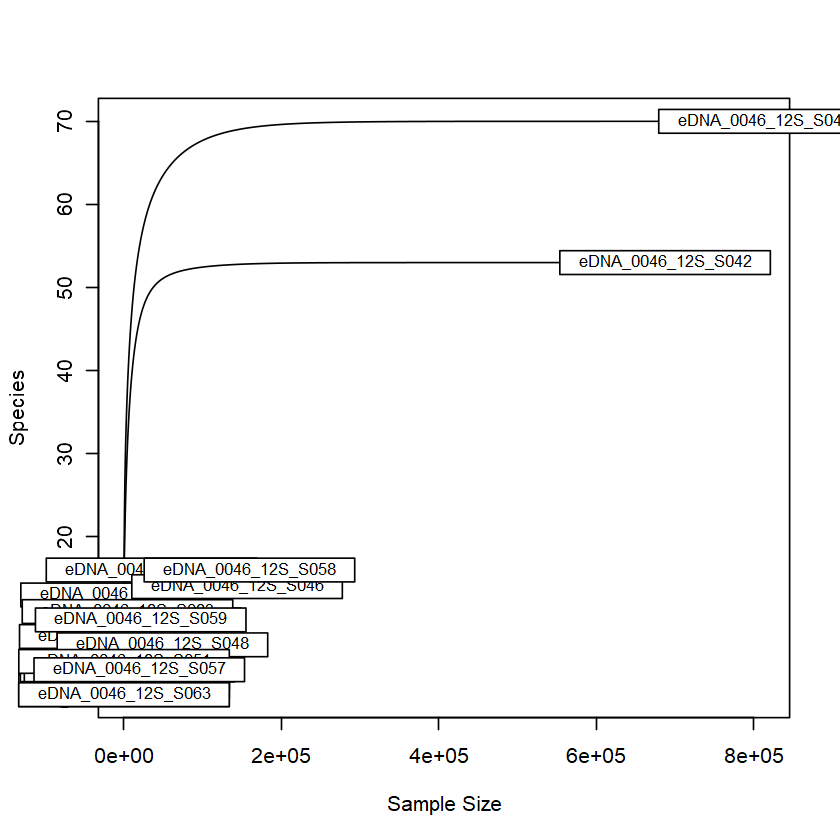

In [90]:
vegan::rarecurve(t(asv_table))

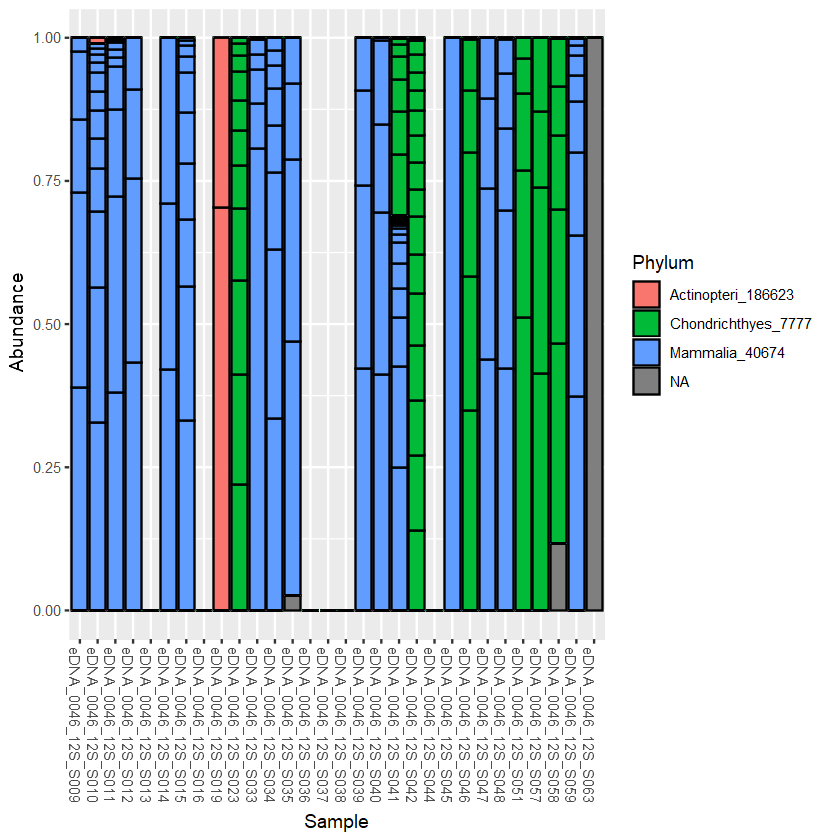

In [91]:
phyloseq_12S |>
microbiome::transform('compositional') |>
phyloseq::plot_bar(fill = "Phylum")

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


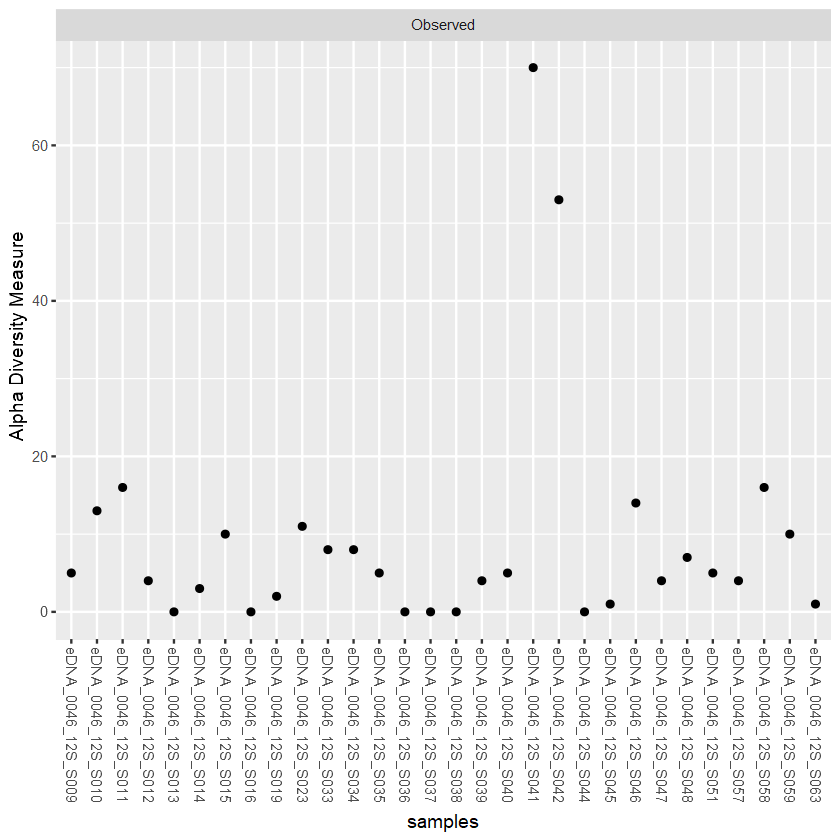

In [92]:
#please not that some of the diversity metrics may require your data to be normalised/rarefied
phyloseq::plot_richness(phyloseq_12S, measures = c('Observed'))

In [93]:
(diversity_measures <- phyloseq::estimate_richness(phyloseq_12S) |>
                       tibble::rownames_to_column(var = "Sample_ID")) |>  head()

Warning message in phyloseq::estimate_richness(phyloseq_12S):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


,Sample_ID,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,eDNA_0046_12S_S009,5,5,0,NaN,NaN,1.338436,0.7016678,3.351968,0.6473791
2,eDNA_0046_12S_S010,13,13,0,NaN,NaN,1.962305,0.8054676,5.140532,1.7778841
3,eDNA_0046_12S_S011,16,16,0,16,1.322876,1.449304,0.7089888,3.436293,1.6013472
4,eDNA_0046_12S_S012,4,4,0,NaN,NaN,1.234426,0.6772744,3.098608,0.4135987
5,eDNA_0046_12S_S013,0,0,NaN,NaN,NaN,0.000000,1.0000000,Inf,0.0000000
6,eDNA_0046_12S_S014,3,3,0,NaN,NaN,1.081925,0.6551247,2.899598,0.5646910


In [94]:
colnames(metadata)

[1] "SampleID_for_DataAnalysis"     "Original_SampleName"          
 [3] "I7_Index_ID"                   "index"                        
 [5] "I5_Index_ID"                   "index2"                       
 [7] "I7_Index_ID"                   "index3"                       
 [9] "I5_Index_ID"                   "index4"                       
[11] "Location"                      "Average.depths"               
[13] "Average.water.temp"            "Wildlife.seen"                
[15] "DNA_conc_after_1stPCR.(ng/ul)" "total_reads"                  
[17] "dilution.ratio"                "X19"

In [113]:
asv_table_PA <- vegan::decostand(otu_table(phyloseq_12S), method = "pa")

In [123]:
PA_dist <- vegan::vegdist(asv_table_PA, "bray")

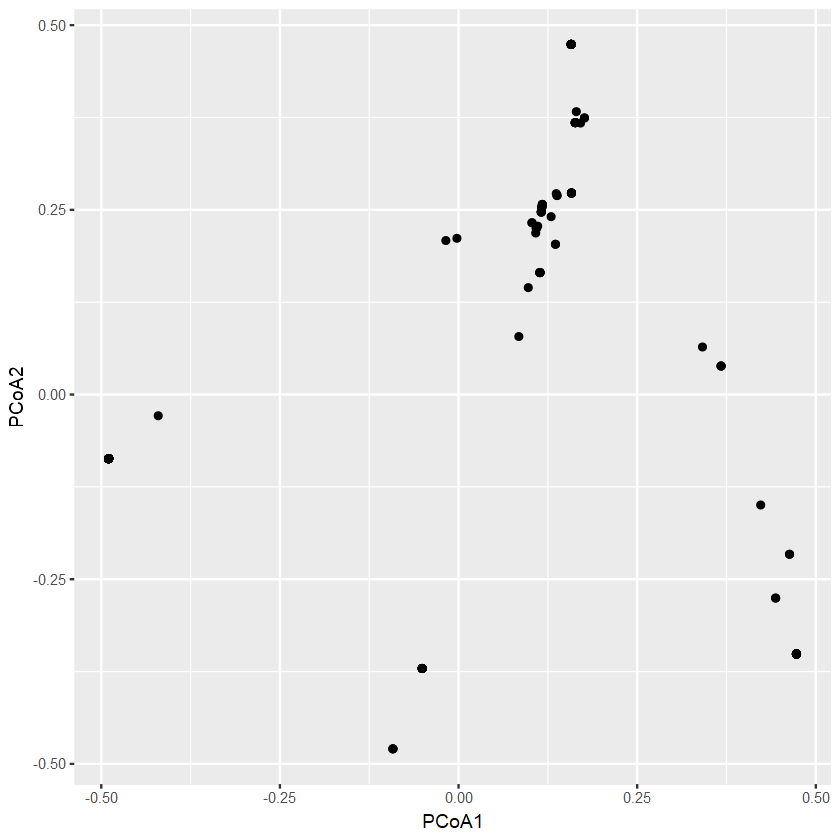

In [140]:
data.frame(cmdscale(PA_dist)) |>
`colnames<-`(c("PCoA1", "PCoA2")) |>
tibble::rownames_to_column(var = "ASV_ID") |>
ggplot(aes(x = PCoA1, y = PCoA2)) + 
geom_point()